### 삼성전자 주가 분석

In [30]:
pip install finance-datareader

In [31]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr

In [32]:
### 삼성전자 주가 다운로드
df = fdr.DataReader('005930', '2000-01-10', '2024-04-26')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-01-10,5600,5770,5580,5770,937615,NaN
2000-01-11,5820,6100,5770,5770,1194974,0.000000
2000-01-12,5610,5740,5600,5720,584492,-0.008666
2000-01-13,5600,5740,5560,5710,823830,-0.001748
2000-01-14,5720,5880,5680,5830,987576,0.021016
...,...,...,...,...,...,...
2024-04-22,77400,77500,75100,76100,30469477,-0.019330
2024-04-23,76400,76800,75500,75500,18717699,-0.007884
2024-04-24,77500,78800,77200,78600,22166150,0.041060


In [33]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Change    1
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5999 entries, 2000-01-10 to 2024-04-26
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5999 non-null   int64  
 1   High    5999 non-null   int64  
 2   Low     5999 non-null   int64  
 3   Close   5999 non-null   int64  
 4   Volume  5999 non-null   int64  
 5   Change  5998 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 328.1 KB


#### 데이터 전처리 및 시각화

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

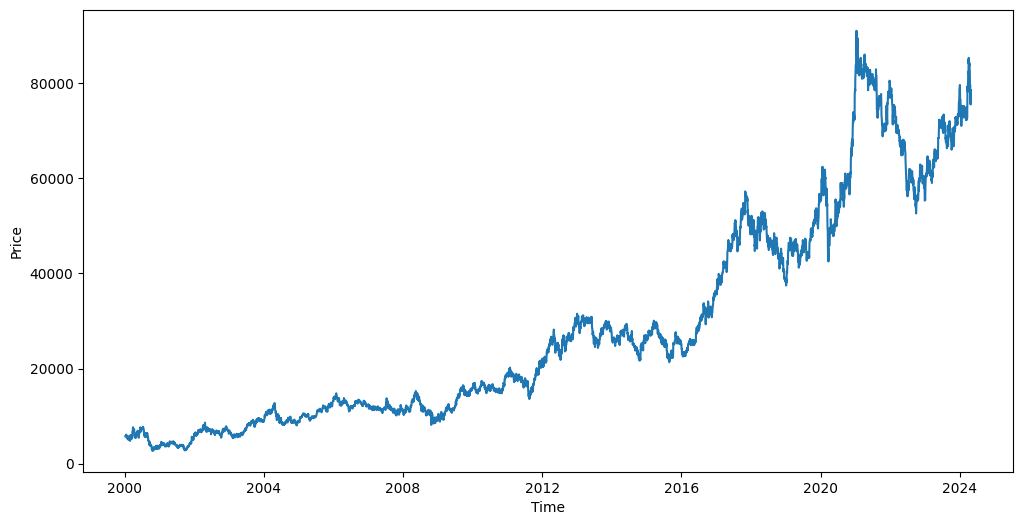

In [36]:
plt.figure(figsize = (12,6))
sns.lineplot(data = df, x = df.index, y = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [37]:
### 주식 분할로 인해 거래가 중지된 데이터
stop = df.loc[df.loc[:, 'Open'] == 0, :]
print(f'거래가 중지된 날의 데이터 : \n{stop}')
print('-'*80)

stop_index = stop.index
print(f'거래가 중지된 날의 데이터 인덱스 : \n{stop_index}')

거래가 중지된 날의 데이터 : 
            Open  High  Low  Close  Volume  Change
Date                                              
2018-04-30     0     0    0  53000       0     0.0
2018-05-02     0     0    0  53000       0     0.0
2018-05-03     0     0    0  53000       0     0.0
--------------------------------------------------------------------------------
거래가 중지된 날의 데이터 인덱스 : 
DatetimeIndex(['2018-04-30', '2018-05-02', '2018-05-03'], dtype='datetime64[ns]', name='Date', freq=None)


In [38]:
sto = df[df['Open'] == 0]
sto_index = sto.index
print(sto_index)

DatetimeIndex(['2018-04-30', '2018-05-02', '2018-05-03'], dtype='datetime64[ns]', name='Date', freq=None)


In [39]:
df.drop(index = sto_index, inplace = True)

In [40]:
df.describe()

,Open,High,Low,Close,Volume,Change
count,5996.000000,5996.000000,5996.000000,5996.00000,5.996000e+03,5995.000000
mean,28485.927618,28763.603069,28196.096398,28476.06571,4.222000e+06,0.000668
std,22411.950513,22585.189308,22219.294190,22391.48768,7.659985e+06,0.021747
min,2540.000000,2760.000000,2420.000000,2730.00000,6.598500e+04,-0.137566
25%,10935.000000,11060.000000,10780.000000,10920.00000,2.943965e+05,-0.010870
50%,21850.000000,22140.000000,21650.000000,21830.00000,5.034685e+05,0.000000
75%,45650.000000,46150.000000,45200.000000,45600.00000,1.975620e+06,0.011689
max,90300.000000,96800.000000,89500.000000,91000.00000,9.030618e+07,0.150000


In [41]:
### 정답 칼럼 생성
df.loc[:, 'target'] = df.loc[:, 'Close']
df

,Open,High,Low,Close,Volume,Change,target
Date,,,,,,,
2000-01-10,5600,5770,5580,5770,937615,NaN,5770
2000-01-11,5820,6100,5770,5770,1194974,0.000000,5770
2000-01-12,5610,5740,5600,5720,584492,-0.008666,5720
2000-01-13,5600,5740,5560,5710,823830,-0.001748,5710
2000-01-14,5720,5880,5680,5830,987576,0.021016,5830
...,...,...,...,...,...,...,...
2024-04-22,77400,77500,75100,76100,30469477,-0.019330,76100
2024-04-23,76400,76800,75500,75500,18717699,-0.007884,75500
2024-04-24,77500,78800,77200,78600,22166150,0.041060,78600


In [42]:
X = df.loc[:, 'Open' : 'Volume']
y = df[['target']]
#y = df.loc[:, ['target']]

In [43]:
y

,target
Date,
2000-01-10,5770
2000-01-11,5770
2000-01-12,5720
2000-01-13,5710
2000-01-14,5830
...,...
2024-04-22,76100
2024-04-23,75500
2024-04-24,78600


In [44]:
'''
# sklearn 라이브러리에 있는 MinMaxScaler 모델을 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [45]:
print(X_scaled)
print('-'*80)
print(y_scaled)

[[0.03486782 0.03200766 0.03628847 0.03443979 0.009659  ]
 [0.03737466 0.0355168  0.03847037 0.03443979 0.01251093]
 [0.03498177 0.03168864 0.03651814 0.03387334 0.00574585]
 ...
 [0.85414768 0.80859209 0.85875057 0.85952192 0.24490379]
 [0.85186873 0.79476818 0.84841525 0.8334655  0.17157708]
 [0.85756609 0.79902169 0.85071199 0.83799705 0.14062076]]
--------------------------------------------------------------------------------
[[0.03443979]
 [0.03443979]
 [0.03387334]
 ...
 [0.85952192]
 [0.8334655 ]
 [0.83799705]]


In [46]:
print(X_scaled.shape)

(5996, 5)


In [47]:
### 시계열 분석에 적합한 데이터를 만들어주는 함수 정의
'''
1. window_size(time step, 시간 간격) 정의
   (1) 얼마 동안(기간)의 주가 데이터에 기반하여 다음날 종가를 예측할 것인가를 정하는 parameter
   (2) 과거 10일을 기반으로 내일 데이터를 예측한다라고 가정했을 때 window_size(시간 간격) = 10이 된다
   (3) 목표 : 과거 10일을 기준으로 그 다음날의 '종가'를 예측할 수 있는 데이터 생성
2.. 순차적으로 10일 동안의 데이터를 하나의 데이터로 묶고,
3. 이에 맞는 label(예측 데이터) 생성
'''
def make_dataset(X, y, window_size = 10):
    X_data_total = []
    y_data_total = []

    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        # X_data --> 슬라이싱
        X_data = X[start:stop, :]
        X_data_total.append(X_data)
        # y_data --> 인덱싱
        y_data = y[stop]
        y_data_total.append(y_data)
    return np.array(X_data_total), np.array(y_data_total)

In [48]:
print(np.arange(5996))
print(len(y))

[   0    1    2 ... 5993 5994 5995]
5996


In [49]:
### 시계열 분석에 적합한 데이터 생성

# 데이터 생성 함수 실행
X_data, y_data = make_dataset(X=X_scaled, y=y_scaled)

# 결과 확인하기
print(f'X_data의 모양 : {X_data.shape}')
print('-'*80)

print(f'첫번째 X_data 확인 : \n{X_data[0, :, :]}')
print('-'*80)

print(f'y_data의 모양 : {y_data.shape}')
print('-'*80)
print(f'첫번째 y_data 확인 : \n{y_data[0, :]}')

X_data의 모양 : (5986, 10, 5)
--------------------------------------------------------------------------------
첫번째 X_data 확인 : 
[[0.03486782 0.03200766 0.03628847 0.03443979 0.009659  ]
 [0.03737466 0.0355168  0.03847037 0.03443979 0.01251093]
 [0.03498177 0.03168864 0.03651814 0.03387334 0.00574585]
 [0.03486782 0.03168864 0.0360588  0.03376005 0.00839809]
 [0.03623519 0.03317737 0.03743684 0.03511952 0.01021264]
 [0.03942571 0.0363675  0.04019293 0.03817832 0.01334387]
 [0.04124886 0.03615483 0.04088195 0.03817832 0.00930014]
 [0.03942571 0.03487877 0.04065227 0.03659227 0.0081801 ]
 [0.03783045 0.03487877 0.03904456 0.03749858 0.0075396 ]
 [0.03885597 0.03424075 0.03973358 0.03568596 0.00647985]]
--------------------------------------------------------------------------------
y_data의 모양 : (5986, 1)
--------------------------------------------------------------------------------
첫번째 y_data 확인 : 
[0.03364677]


#### 학습용 데이터 생성(train, test)

In [99]:
'''
# TEST_SIZE 설정
   (1) TEST_SIZE = 200으로 설정
   (2) TEST_SIZE = 200은 가장 최근 200일의 데이터로 모델이 주가를 예측
   (3) 학습은 과거부터 200일 이전의 데이터를 학습
'''
## 학습용 / 평갸용 데이터 생성

# 평가용 데이터의 크기 설정
TEST_SIZE = 200

# 학습용 데이터 생성
X_train = X_data[0:-TEST_SIZE, :, :]
y_train = y_data[0:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]


## 학습용 데이터 --> 학습용과 검증용 데이터 생성
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)



In [51]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5786, 10, 5) (5786, 1)
(200, 10, 5) (200, 1)


In [126]:
### 학습용 / 검증용 / 평가용 데이터의 모양 확인
print(f'학습용 X 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 y 데이터의 모양 : {y_train.shape}')
print('-'*80)
print(f'검증용 X 데이터의 모양 : {X_val.shape}')
print('-'*80)
print(f'검증용 y 데이터의 모양 : {y_val.shape}')
print('-'*80)
print(f'평가용 X 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 y 데이터의 모양 : {y_test.shape}')

학습용 X 데이터의 모양 : (4628, 10, 5)
--------------------------------------------------------------------------------
학습용 y 데이터의 모양 : (4628, 1)
--------------------------------------------------------------------------------
검증용 X 데이터의 모양 : (1158, 10, 5)
--------------------------------------------------------------------------------
검증용 y 데이터의 모양 : (1158, 1)
--------------------------------------------------------------------------------
평가용 X 데이터의 모양 : (200, 10, 5)
--------------------------------------------------------------------------------
평가용 y 데이터의 모양 : (200, 1)


#### 주가 예측 모델 생성

In [118]:
### 랜덤 시드 설정

import tensorflow as tf
import random

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)
initializer1 = tf.keras.initializers.GlorotUniform(seed=0)
initializer2 = tf.keras.initializers.Orthogonal(seed=0)


In [101]:
### 모델 구조 정의(1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units = 128,
                               kernel_initializer = initializer1,
                               recurrent_initializer = initializer2,
                               input_shape = (10, 5)))
model.add(tf.keras.layers.Dense(units = 1, kernel_initializer = initializer1))

In [102]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               68608     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 68737 (268.50 KB)
Trainable params: 68737 (268.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [119]:
### 모델 구조 정의(2)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.LSTM(units = 128,
                               return_sequences = True,
                               kernel_initializer = initializer1,
                               recurrent_initializer = initializer2,
                               input_shape = (10, 5)))
model1.add(tf.keras.layers.LSTM(units = 128,
                               kernel_initializer = initializer1,
                               recurrent_initializer = initializer2,
                               input_shape = (10, 5)))
model1.add(tf.keras.layers.Dense(units = 1, kernel_initializer = initializer1))

model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 10, 128)           68608     
                                                                 
 lstm_10 (LSTM)              (None, 128)               131584    
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 200321 (782.50 KB)
Trainable params: 200321 (782.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [121]:
### 학습 전 모델의 가중치 확인
for layer in model.layers:
  print(f'layer의 이름 : {layer.name}')
  print('-'*80)
  print(f'layer의 학습 전 가중치 : \n{layer.weights}')
  print('-'*80)

layer의 이름 : lstm_4
--------------------------------------------------------------------------------
layer의 학습 전 가중치 : 
[<tf.Variable 'lstm_4/lstm_cell/kernel:0' shape=(5, 512) dtype=float32, numpy=
array([[-0.05937741,  0.04716076,  0.06347638, ..., -0.08669626,
        -0.07727249,  0.02695082],
       [ 0.09298793, -0.10334729, -0.10092709, ...,  0.05028851,
        -0.10360676,  0.04477842],
       [-0.09158954, -0.04713396,  0.04026448, ...,  0.04569533,
        -0.1112688 , -0.00332273],
       [-0.00500221, -0.09412994, -0.04059869, ..., -0.01540453,
         0.04300027,  0.01624376],
       [-0.05194099, -0.04940221, -0.09214781, ..., -0.09120841,
         0.07819101,  0.07771947]], dtype=float32)>, <tf.Variable 'lstm_4/lstm_cell/recurrent_kernel:0' shape=(128, 512) dtype=float32, numpy=
array([[-0.07718344, -0.00329557,  0.00031632, ...,  0.03954379,
         0.00928726, -0.05961994],
       [-0.01933682,  0.06556965,  0.03268216, ...,  0.04031672,
        -0.00384975,  0.09582

In [122]:
### LSTM을 2중으로 구성 후 학습 전 모델의 가중치 확인
for layer in model1.layers:
    print(f'layer의 이름 : {layer.name}')
    print(f'-'*80)
    print(f'layer의 학습 전 가중치 ; \n{layer.weights}')
    print('-'*89)

layer의 이름 : lstm_9
--------------------------------------------------------------------------------
layer의 학습 전 가중치 ; 
[<tf.Variable 'lstm_9/lstm_cell/kernel:0' shape=(5, 512) dtype=float32, numpy=
array([[-0.0622637 ,  0.04438627,  0.06465071, ..., -0.09064465,
        -0.07346749,  0.03052305],
       [ 0.08996016, -0.10624683, -0.09971879, ...,  0.04613893,
        -0.09977889,  0.04842556],
       [-0.094579  , -0.05000199,  0.04142131, ...,  0.04160818,
        -0.10745816,  0.00030097],
       [-0.00814179, -0.09713023, -0.0393829 , ..., -0.01971547,
         0.04683495,  0.01995286],
       [-0.05409528, -0.0514544 , -0.08802062, ..., -0.09425005,
         0.08288628,  0.0809633 ]], dtype=float32)>, <tf.Variable 'lstm_9/lstm_cell/recurrent_kernel:0' shape=(128, 512) dtype=float32, numpy=
array([[-0.07523012, -0.00123573, -0.00818451, ...,  0.04133026,
         0.00508755, -0.06259896],
       [-0.0213833 ,  0.06344116,  0.04294724, ...,  0.03836303,
         0.00013019,  0.09875

#### 모델 학습

In [123]:
### 모델 컴파일(compile)하기
'''
# 컴파일(compile)
1. 학습(가중치 업데이트)에 대한 환경을 설정하여 모델을 완성하기
2. 손실 함수 설정 --> 값 예측 --> loss --> mean_squared_error
3. 최적화 함수 설정 --> optimizer --> adam 사용
'''
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [124]:
### LSTM을 이중으로 구성한 후 모델 컴파일(compile)하기
'''
# 컴파일(compile)
1. 학습(가중치 업데이트)에 대한 환경을 설정하여 모델을 완성하기
2. 손실 함수 설정 --> 값 예측 --> loss --> mean_squared_error
3. 최적화 함수 설정 --> optimizer --> adam 사용
'''
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(loss='mean_squared_error', optimizer=optimizer)

In [98]:
### 모델 학습하기

# 조기 종료 조건 설정
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    verbose = 1
)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
file_path = '/content/drive/MyDrive/KDT/딥러닝/자연어처리/lstm.h5'

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=file_path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True
)

# 학습 진행
model.fit(x = X_train, y = y_train,
          batch_size = 256, epochs = 200,
          callbacks = [earlystop, checkpoint],
          validation_split=0.2)

Epoch 1/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0152
Epoch 1: val_loss improved from inf to 0.03881, saving model to /content/drive/MyDrive/KDT/딥러닝/자연어처리/lstm.h5
19/19 [==============================] - 4s 98ms/step - loss: 0.0145 - val_loss: 0.0388
Epoch 2/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0013
Epoch 2: val_loss improved from 0.03881 to 0.00045, saving model to /content/drive/MyDrive/KDT/딥러닝/자연어처리/lstm.h5
19/19 [==============================] - 1s 45ms/step - loss: 0.0012 - val_loss: 4.5237e-04
Epoch 3/200
19/19 [==============================] - ETA: 0s - loss: 6.1964e-04
Epoch 3: val_loss did not improve from 0.00045
19/19 [==============================] - 1s 42ms/step - loss: 6.1964e-04 - val_loss: 0.0010
Epoch 4/200
17/19 [=========================>....] - ETA: 0s - loss: 2.9937e-04
Epoch 4: val_loss did not improve from 0.00045
19/19 [==============================] - 1s 42ms/step - loss: 2.9792e-04 - val_loss: 0.001

In [104]:
### 모델 학습하기

# 조기 종료 조건 설정
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    verbose = 1
)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
file_path = '/content/drive/MyDrive/KDT/딥러닝/자연어처리/lstm.h5'

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=file_path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True
)

# 학습 진행
model.fit(x = X_train, y = y_train,
          batch_size = 256, epochs = 200,
          validation_data = (X_val, y_val),
          callbacks = [earlystop, checkpoint])

Epoch 1/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0390
Epoch 1: val_loss improved from inf to 0.00959, saving model to /content/drive/MyDrive/KDT/딥러닝/자연어처리/lstm.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 5s 125ms/step - loss: 0.0389 - val_loss: 0.0096
Epoch 2/200
17/19 [=========================>....] - ETA: 0s - loss: 0.0030
Epoch 2: val_loss improved from 0.00959 to 0.00113, saving model to /content/drive/MyDrive/KDT/딥러닝/자연어처리/lstm.h5
19/19 [==============================] - 1s 43ms/step - loss: 0.0029 - val_loss: 0.0011
Epoch 3/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0011
Epoch 3: val_loss improved from 0.00113 to 0.00052, saving model to /content/drive/MyDrive/KDT/딥러닝/자연어처리/lstm.h5
19/19 [==============================] - 1s 44ms/step - loss: 0.0011 - val_loss: 5.2183e-04
Epoch 4/200
17/19 [=========================>....] - ETA: 0s - loss: 4.6394e-04
Epoch 4: val_loss improved from 0.00052 to 0.00039, saving model to /content/drive/MyDrive/KDT/딥러닝/자연어처리/lstm.h5
19/19 [==============================] - 1s 45ms/step - loss: 4.5972e-04 - val_loss: 3.8826e-04
Epoch 5/200
18/19 [===========================>..

In [125]:
### LSTM을 이중으로 구성 후 모델 학습하기
# 조기 종료 조건 설정
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)
# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
file_path='/content/drive/MyDrive/KDT/딥러닝/자연어처리/lstm_double.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=file_path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True
)
# 학습 진행
model1.fit(x=X_train,
           y=y_train,
           batch_size=256,
           validation_data=(X_val, y_val),
           epochs=200,
           callbacks=[earlystop, checkpoint]
          )

Epoch 1/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0189
Epoch 1: val_loss improved from inf to 0.00588, saving model to /content/drive/MyDrive/KDT/딥러닝/자연어처리/lstm_double.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 8s 198ms/step - loss: 0.0188 - val_loss: 0.0059
Epoch 2/200
18/19 [===========================>..] - ETA: 0s - loss: 0.0021
Epoch 2: val_loss improved from 0.00588 to 0.00022, saving model to /content/drive/MyDrive/KDT/딥러닝/자연어처리/lstm_double.h5
19/19 [==============================] - 2s 106ms/step - loss: 0.0021 - val_loss: 2.1704e-04
Epoch 3/200
18/19 [===========================>..] - ETA: 0s - loss: 3.9211e-04
Epoch 3: val_loss did not improve from 0.00022
19/19 [==============================] - 2s 103ms/step - loss: 3.9129e-04 - val_loss: 2.5050e-04
Epoch 4/200
18/19 [===========================>..] - ETA: 0s - loss: 1.9311e-04
Epoch 4: val_loss improved from 0.00022 to 0.00019, saving model to /content/drive/MyDrive/KDT/딥러닝/자연어처리/lstm_double.h5
19/19 [==============================] - 2s 107ms/step - loss: 1.9281e-04 - val_loss: 1.8759e-04
Epoch 5/200
18/19 [===========================>..] - ETA: 0s - loss: 1.6995e-04

#### 모델 평가

In [58]:
prediction = model.predict(X_test)
print(f'최근 200일 동안의 삼정전자 주가 예측 : \n{prediction}')

7/7 [==============================] - 1s 6ms/step
최근 200일 동안의 삼정전자 주가 예측 : 
[[0.80749196]
 [0.80890095]
 [0.80882734]
 [0.8058653 ]
 [0.8027392 ]
 [0.8004854 ]
 [0.79943234]
 [0.7984296 ]
 [0.7995377 ]
 [0.8019021 ]
 [0.8027372 ]
 [0.8035051 ]
 [0.80303335]
 [0.80065995]
 [0.79949826]
 [0.79690176]
 [0.791454  ]
 [0.7894239 ]
 [0.7882739 ]
 [0.78726566]
 [0.7868621 ]
 [0.7858092 ]
 [0.78330636]
 [0.7816277 ]
 [0.779051  ]
 [0.7756354 ]
 [0.7725832 ]
 [0.76983505]
 [0.7665291 ]
 [0.7634124 ]
 [0.758889  ]
 [0.7547641 ]
 [0.75054437]
 [0.74816036]
 [0.7464406 ]
 [0.7450505 ]
 [0.74458253]
 [0.74507564]
 [0.7448502 ]
 [0.7443316 ]
 [0.7446791 ]
 [0.74401134]
 [0.74522793]
 [0.751576  ]
 [0.75920105]
 [0.76513475]
 [0.7688303 ]
 [0.7733652 ]
 [0.77763623]
 [0.7812909 ]
 [0.78416324]
 [0.7869696 ]
 [0.78945583]
 [0.788879  ]
 [0.78903335]
 [0.7885981 ]
 [0.7867835 ]
 [0.7842327 ]
 [0.7812329 ]
 [0.77876997]
 [0.7752306 ]
 [0.76897156]
 [0.7639185 ]
 [0.7591741 ]
 [0.75425977]
 [0.7522314 ]

In [105]:
# 성능 개선 후 평가용 데이터를 이용한 예측
prediction = model.predict(X_test)
print(f'최근 200일 동안의 삼정전자 주가 예측 : \n{prediction}')

7/7 [==============================] - 0s 5ms/step
최근 200일 동안의 삼정전자 주가 예측 : 
[[0.79106736]
 [0.7922554 ]
 [0.79205334]
 [0.7891141 ]
 [0.78578913]
 [0.78363204]
 [0.78268003]
 [0.78206336]
 [0.78348196]
 [0.7858025 ]
 [0.7866094 ]
 [0.7872275 ]
 [0.7865176 ]
 [0.78416556]
 [0.7828212 ]
 [0.7802563 ]
 [0.7755374 ]
 [0.7739847 ]
 [0.77307785]
 [0.7718792 ]
 [0.77136964]
 [0.7702596 ]
 [0.7678302 ]
 [0.7658958 ]
 [0.76316094]
 [0.75990474]
 [0.7574023 ]
 [0.754854  ]
 [0.7518173 ]
 [0.7488222 ]
 [0.744643  ]
 [0.74078083]
 [0.73692787]
 [0.7347225 ]
 [0.7332126 ]
 [0.73204446]
 [0.7321653 ]
 [0.73251224]
 [0.7321402 ]
 [0.73164314]
 [0.73205006]
 [0.73159075]
 [0.7335861 ]
 [0.74027914]
 [0.7472128 ]
 [0.75237656]
 [0.7556602 ]
 [0.7594439 ]
 [0.7630893 ]
 [0.7662335 ]
 [0.76886964]
 [0.77168596]
 [0.77430594]
 [0.77385676]
 [0.7736318 ]
 [0.77284837]
 [0.7708176 ]
 [0.76809824]
 [0.76533157]
 [0.763117  ]
 [0.75995505]
 [0.7544366 ]
 [0.74971366]
 [0.74514747]
 [0.7406152 ]
 [0.7392137 ]

In [68]:
### 평가용 데이터에 대한 예측 결과 --> 데이터프레임 생성

# pd.DataFrame() 호출
index = y.iloc[-200:].index
df_test = pd.DataFrame(data = y_test, index = index, columns = ['y_test'])

# 칼럼 추가
#df_test['prediction'] = prediction
df_test.loc[:, 'prediction'] = prediction

df_test

,y_test,prediction
Date,,
2023-07-05,0.784751,0.807492
2023-07-06,0.780220,0.808901
2023-07-07,0.760961,0.808827
2023-07-10,0.756429,0.805865
2023-07-11,0.779087,0.802739
...,...,...
2024-04-22,0.831200,0.915150
2024-04-23,0.824402,0.904464
2024-04-24,0.859522,0.894974


In [106]:
### 성능 개선 후 평가용 데이터에 대한 예측 결과 --> 데이터프레임 생성

# pd.DataFrame() 호출
index = y.iloc[-200:].index
df_test = pd.DataFrame(data = y_test, index = index, columns = ['y_test'])

# 칼럼 추가
#df_test['prediction'] = prediction
df_test.loc[:, 'prediction'] = prediction

df_test

,y_test,prediction
Date,,
2023-07-05,0.784751,0.791067
2023-07-06,0.780220,0.792255
2023-07-07,0.760961,0.792053
2023-07-10,0.756429,0.789114
2023-07-11,0.779087,0.785789
...,...,...
2024-04-22,0.831200,0.888743
2024-04-23,0.824402,0.878754
2024-04-24,0.859522,0.869630


In [74]:
### 평가용 데이터 예측 결과 --> normalize 이전의 형태로 복원
pred_inverse = scaler.inverse_transform(prediction)
print(f'원래 가격으로 변환시킨 삼성 전자 주가 예측 값: \n{pred_inverse}')

원래 가격으로 변환시킨 삼성 전자 주가 예측 값: 
[[74007.31 ]
 [74131.69 ]
 [74125.19 ]
 [73863.73 ]
 [73587.79 ]
 [73388.84 ]
 [73295.89 ]
 [73207.38 ]
 [73305.195]
 [73513.9  ]
 [73587.61 ]
 [73655.4  ]
 [73613.76 ]
 [73404.26 ]
 [73301.71 ]
 [73072.516]
 [72591.65 ]
 [72412.445]
 [72310.94 ]
 [72221.94 ]
 [72186.31 ]
 [72093.38 ]
 [71872.45 ]
 [71724.28 ]
 [71496.836]
 [71195.336]
 [70925.92 ]
 [70683.34 ]
 [70391.52 ]
 [70116.414]
 [69717.13 ]
 [69353.02 ]
 [68980.555]
 [68770.12 ]
 [68618.31 ]
 [68495.61 ]
 [68454.3  ]
 [68497.83 ]
 [68477.93 ]
 [68432.15 ]
 [68462.82 ]
 [68403.88 ]
 [68511.27 ]
 [69071.62 ]
 [69744.68 ]
 [70268.445]
 [70594.65 ]
 [70994.945]
 [71371.95 ]
 [71694.55 ]
 [71948.086]
 [72195.805]
 [72415.266]
 [72364.34 ]
 [72377.98 ]
 [72339.555]
 [72179.38 ]
 [71954.22 ]
 [71689.43 ]
 [71472.02 ]
 [71159.6  ]
 [70607.12 ]
 [70161.086]
 [69742.3  ]
 [69308.51 ]
 [69129.47 ]
 [69218.26 ]
 [69368.9  ]
 [69322.85 ]
 [69342.1  ]
 [69562.58 ]
 [69836.8  ]
 [70018.19 ]
 [70210.086]
 [70309.7

In [107]:
### 성능 개선 후 평가용 데이터 예측 결과 --> normalize 이전의 형태로 복원
pred_inverse = scaler.inverse_transform(prediction)
print(f'원래 가격으로 변환시킨 삼성 전자 주가 예측 값: \n{pred_inverse}')

원래 가격으로 변환시킨 삼성 전자 주가 예측 값: 
[[72557.516]
 [72662.38 ]
 [72644.55 ]
 [72385.1  ]
 [72091.61 ]
 [71901.2  ]
 [71817.164]
 [71762.734]
 [71887.95 ]
 [72092.79 ]
 [72164.016]
 [72218.57 ]
 [72155.914]
 [71948.3  ]
 [71829.625]
 [71603.22 ]
 [71186.69 ]
 [71049.625]
 [70969.58 ]
 [70863.77 ]
 [70818.8  ]
 [70720.82 ]
 [70506.375]
 [70335.62 ]
 [70094.22 ]
 [69806.79 ]
 [69585.9  ]
 [69360.96 ]
 [69092.914]
 [68828.54 ]
 [68459.63 ]
 [68118.73 ]
 [67778.625]
 [67583.95 ]
 [67450.67 ]
 [67347.56 ]
 [67358.23 ]
 [67388.85 ]
 [67356.016]
 [67312.14 ]
 [67348.06 ]
 [67307.516]
 [67483.64 ]
 [68074.44 ]
 [68686.48 ]
 [69142.28 ]
 [69432.125]
 [69766.11 ]
 [70087.89 ]
 [70365.43 ]
 [70598.125]
 [70846.72 ]
 [71077.984]
 [71038.336]
 [71018.48 ]
 [70949.33 ]
 [70770.07 ]
 [70530.03 ]
 [70285.82 ]
 [70090.336]
 [69811.234]
 [69324.12 ]
 [68907.23 ]
 [68504.164]
 [68104.1  ]
 [67980.39 ]
 [68077.73 ]
 [68185.96 ]
 [68128.484]
 [68167.414]
 [68397.94 ]
 [68663.67 ]
 [68821.69 ]
 [68974.53 ]
 [69054.6

In [108]:
df_test.loc[:, 'test_origin'] = y.iloc[-200:, :].values
df_test

,y_test,prediction,test_origin
Date,,,
2023-07-05,0.784751,0.791067,72000
2023-07-06,0.780220,0.792255,71600
2023-07-07,0.760961,0.792053,69900
2023-07-10,0.756429,0.789114,69500
2023-07-11,0.779087,0.785789,71500
...,...,...,...
2024-04-22,0.831200,0.888743,76100
2024-04-23,0.824402,0.878754,75500
2024-04-24,0.859522,0.869630,78600


In [109]:
df_test.loc[:, 'pred_origin'] = pred_inverse
df_test

,y_test,prediction,test_origin,pred_origin
Date,,,,
2023-07-05,0.784751,0.791067,72000,72557.515625
2023-07-06,0.780220,0.792255,71600,72662.382812
2023-07-07,0.760961,0.792053,69900,72644.546875
2023-07-10,0.756429,0.789114,69500,72385.101562
2023-07-11,0.779087,0.785789,71500,72091.609375
...,...,...,...,...
2024-04-22,0.831200,0.888743,76100,81179.328125
2024-04-23,0.824402,0.878754,75500,80297.625000
2024-04-24,0.859522,0.869630,78600,79492.226562


In [110]:
error = df_test.loc[:, 'test_origin'] - df_test.loc[:, 'pred_origin']
df_test.loc[:, 'error'] = error
df_test

,y_test,prediction,test_origin,pred_origin,error
Date,,,,,
2023-07-05,0.784751,0.791067,72000,72557.515625,-557.515625
2023-07-06,0.780220,0.792255,71600,72662.382812,-1062.382812
2023-07-07,0.760961,0.792053,69900,72644.546875,-2744.546875
2023-07-10,0.756429,0.789114,69500,72385.101562,-2885.101562
2023-07-11,0.779087,0.785789,71500,72091.609375,-591.609375
...,...,...,...,...,...
2024-04-22,0.831200,0.888743,76100,81179.328125,-5079.328125
2024-04-23,0.824402,0.878754,75500,80297.625000,-4797.625000
2024-04-24,0.859522,0.869630,78600,79492.226562,-892.226562


In [ ]:
y.iloc[-200:, :].values

<Figure size 1200x600 with 0 Axes>

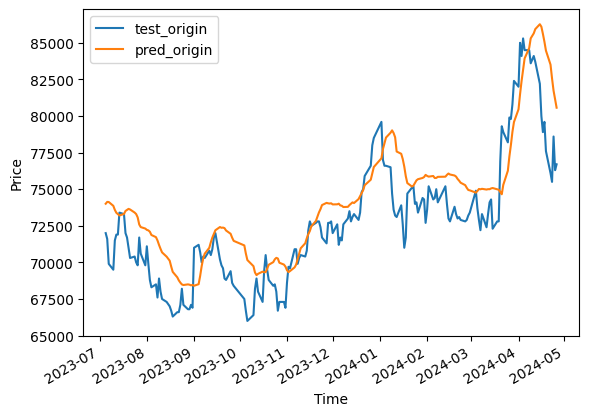

In [81]:
### 결과 시각화
plt.figure(figsize=(12,6))
df_test.loc[:, 'test_origin':'pred_origin'].plot(kind='line')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

<Figure size 1200x600 with 0 Axes>

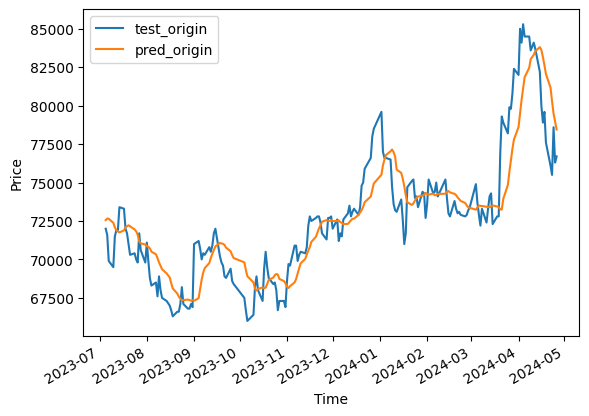

In [111]:
### 성능 개선 후 결과 시각화
plt.figure(figsize=(12,6))
df_test.loc[:, 'test_origin':'pred_origin'].plot(kind='line')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()